# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-4-선형대수기초 대응분석관련-15 (55일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat - 대응분석 정리

## 이번에는 대응분석에 대해서 설명합니다.
http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/120-correspondence-analysis-theory-and-practice/

이번에도 [전편](http://localhost:8888/notebooks/PART04/23-95%25%20R로%20분석%20다시보기-2-treat-4-선형대수기초-대응분석관련-14.ipynb) 에 계속 해서 진행 합니다.

전편에선 G-Test 에 대해서 정리 했습니다. 이번에는 대응분석에 대해서 정리합니다.

## 요구 패키지 들
FactorMineR : CA 계산 패키지
factoextra  : 결과를 출력 그래프로 표시

In [7]:
#install.packages("FactoMineR")
#install.packages("factoextra")

In [8]:
# 패키지 로드
library(FactoMineR)
library(factoextra)

데모 데이터로 housetasks 를 사용합니다. 
* row 는 여러 집안일들을 나타내고
* column 은 누가 일을 한것인지 표시합니다. (아내, 남편, 공동, 위탁) 으로 구분합니다.
* 각 셀의 값은 빈도수를 나타냅니다.

In [9]:
# data 준비 housetasks 는 factoextra 에 포함된 데이터 입니다.
data(housetasks)

In [10]:
#head(housetasks) 교차표를 보면 다음과 같습니다.
housetasks

,Wife,Alternating,Husband,Jointly
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfeast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3
Finances,13,13,21,66


데이터 내용을 보면
* Main_Meal, 세탁, 저녁 등은 주부가 주로 담당합니다.
* 수리 는 남편이 주로 담당합니다.
* 휴일은 부부 공동 담당합니다.

In [11]:
# 카이제곱 분석을 먼저 시행하면
chisq <- chisq.test(housetasks)
chisq


	Pearson's Chi-squared test

data:  housetasks
X-squared = 1944.5, df = 36, p-value < 2.2e-16


## 대응분석 (Correspondence Ananysis)

대응분석 CA 는 매우 큰 교차표 테이블에서 사용합니다. 즉 많은 변수중에서 가장 효과적인 2개의 차원을 선택하여 그래프 적으로 표현하여 분석하기 쉽도록 합니다. 즉 교차표에서 PCA 와 같이 차원 축소를 합니다. 각 차원에에는 고유값이라는 정보를 가지고 있습니다.  

전체 정보 또는 관성은 phi 로 표시 합니다.
$$
\phi^2 = \dfrac{\chi^2}{grand.total}
$$

주어진 축에서 고유값은 다음과 같이 계산됩니다.
$$
\lambda_{axis} = \sum \dfrac{row.sum}{grand.total} * row.coord^2
$$

이고 이것은  다음과 같습니다.
$$
\lambda_{axis} = \sum \dfrac{col.sum}{grand.total} * col.coord^2
$$

* row.coor, col.coord : 축의 가로, 세로 변수 입니다,

가로변수와 세로변수의 연관지수 는 다음과 같이 정의 합니다.
$$
i = i + \sum \dfrac{row.coord * col.coord}{sqrt{\lambda}}
$$

* $\lambda$ : 축의 고유값
* sum : 모든 축의 합

축에서 가로 세로 변숙 같은 부호를 가지면, 강하게 끌리는 것을 말하고, 다른 부호이면 강하게 밀치는 것을 말한다. 높은 값은 강한 끌림 또는 밀침을 나타낸다.

## CA - 표준잔차의 SVD

CA 하기 위해선 다음 과정을 진행한다.

STEP 1. 표준 잔차를 구합니다.

표준잔차는 S 또는 Z 로 다음과 같이 구합니다.
$$
S = \dfrac{o - e}{sqrt{e}}
$$

S 는 카이제곱 통계량 의 제곱근입니다.

STEP II. 표준잔차의 SVD 를 시행합니다.

$$
M = \dfrac{1}{\sqrt{grand.total}} \times S
$$

그럼 SVD 는 직교행렬 U, V 와 대각선 행렬 $\Delta$ 로 다음과 같은 관계식을 구하는 과정입니다.
$$
M = U \Delta V^T
$$

U : 가로 변수들의 고유벡터 입니다.
$\Delta$ : 대각선 행렬로 특이값 SV(Singular Value) 를 대각선으로 갖습니다. 고유값은 SV 의 제곱입니다.
V : 세로 변수들의 고유벡터 입니다.

고유값은 $\lambda = \delta^2$ 입니다.
* $\delta$ 는 특이값 입니다. sv

주어진 축에서 가로 변수들의 좌표는 
$$
row.coord = \dfrac{U * \delta}{\sqrt{row.mass}}
$$

세로변수들의 좌표는
$$
col.coord = \dfrac{V * \delta}{\sqrt{col.mass}}
$$

입니다.


R 에서 SVD 를 수행 해보면

In [12]:
# Grand.total
n <- sum(housetasks)

# 표준잔차
residuals <- chisq$residuals/sqrt(n)

# 차원 갯수 Number of dimensions
nb.axes <- min(nrow(residuals) - 1, ncol(residuals) - 1)

# svd
res.svd <- svd(residuals, nu = nb.axes, nv = nb.axes)

res.svd

-0.42762952,-0.23587902,-0.28228398
-0.35197789,-0.21761257,-0.13633376
-0.23391020,-0.11493572,-0.14480767
-0.19557424,-0.19231779,0.17519699
-0.14136307,0.17221046,-0.06990952
-0.06528142,0.16864510,0.19063825
-0.04189568,0.15859251,0.14910925
0.07216535,-0.08919754,0.60778606
0.28421536,-0.27652950,0.43123528
0.09354184,0.23576569,0.02484968
0.24793268,0.20050833,-0.22918636


In [13]:
# 값을 가져오면
sv <- res.svd$d[1:nb.axes] # 특이값
u <- res.svd$u
v <- res.svd$v

### 고유값과 스크린 플롯( Eigenvalues, Screenplot)

In [15]:
# 고유값
eig <- sv^2

# 분산값 퍼센트 값으로
variance <- eig * 100 /sum(eig)

# 누적 분산값
cumvar <- cumsum(variance)

eig <- data.frame(eig = eig, variance = variance, cumvariance = cumvar)
eig

eig,variance,cumvariance
0.5428893,48.69222,48.69222
0.4450028,39.91269,88.60491
0.1270484,11.39509,100.00000


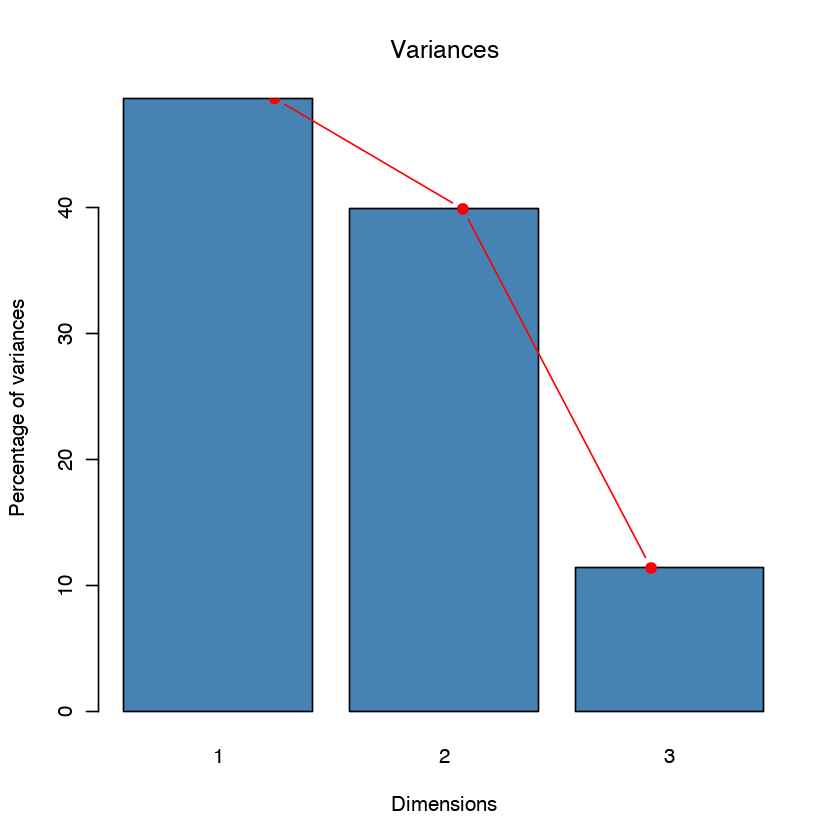

In [17]:
# 스트린 플롯을 보면
barplot(eig[,2], names.arg=1:nrow(eig),
       main = "Variances",
       xlab = "Dimensions",
       ylab = "Percentage of variances",
       col = "steelblue")

# 연결선 추가
lines(x = 1:nrow(eig), eig[,2], type = "b", pch=19, col="red")

위 그래프에서 최대 CA 축은 몇개일까? 답: nb.axes = min(r-1, c-1) 
여기서 r 과 c 는 각각 가로 변수, 세로 변수를 말한다.  
적절한 축의 갯수는 elbow 방법을 사용하는데, 이것은 축의 갯수를 2개부터 늘여나가 변화가 없을때 그때의 축의 갯수를 정한다.

### 가로 변수 좌표 (Row coordinates)

apply() 함수를 사용하여 가로(row), 세로 (column) 변수 행렬 을 찾습니다. 간단한 형식은
appy(X, margin, FUN, ...) 입니다.
* X: 행렬
* margin: 1 또는 2. 1은 가로변수들 (row) 에 대한 행렬을 찾는것, 2는 세로변수 (column) 변수를 찾는 것임.
* FUN: 적용할 함수
* ... : 선택적 매개 변수들 


In [25]:
# row sum
row.sum <- apply(housetasks, 1, sum)

# row mass
row.mass <- row.sum /n

# row coord = sv * u / sqrt(row.mass)
# sv 는 특이값
cc <- t(apply(u, 1, '*', sv)) # 각 row * sv

row.coord <- apply(cc, 2, '/', sqrt(row.mass))
rownames(row.coord) <- rownames(housetasks)
colnames(row.coord) <- paste0("Dim", 1:nb.axes)
round(row.coord, 3)

,Dim1,Dim2,Dim3
Laundry,-0.992,-0.495,-0.317
Main_meal,-0.876,-0.490,-0.164
Dinner,-0.693,-0.308,-0.207
Breakfeast,-0.509,-0.453,0.220
Tidying,-0.394,0.434,-0.094
Dishes,-0.189,0.442,0.267
Shopping,-0.118,0.403,0.203
Official,0.227,-0.254,0.923
Driving,0.742,-0.653,0.544
Finances,0.271,0.618,0.035


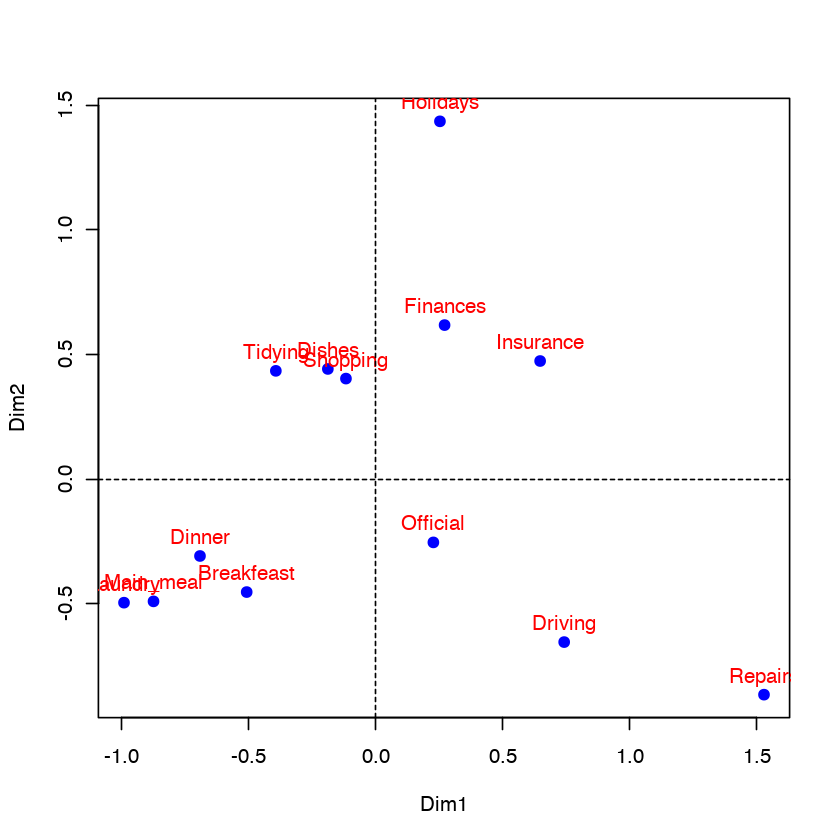

In [29]:
# plot
plot(row.coord, pch=19, col="blue")
text(row.coord, labels=rownames(row.coord), pos = 3, col="red")
abline(v=0, h=0, lty=2)

### 세로변수 좌표 (Column coordinates)

In [30]:
# Column 좌표들
col.sum <- apply(housetasks, 2, sum)
col.mass <- col.sum /n

# coordinate sv * v /sqrt(col.mass)
cc <- t(apply(v, 1, '*', sv))
col.coord <- apply(cc, 2, '/', sqrt(col.mass))
rownames(col.coord) <- colnames(housetasks)
colnames(col.coord) <- paste0("Dim", 1:nb.axes)
col.coord

,Dim1,Dim2,Dim3
Wife,-0.83762154,-0.3652207,-0.19991139
Alternating,-0.06218462,-0.2915938,0.84858939
Husband,1.16091847,-0.6019199,-0.18885924
Jointly,0.14942609,1.0265791,-0.04644302


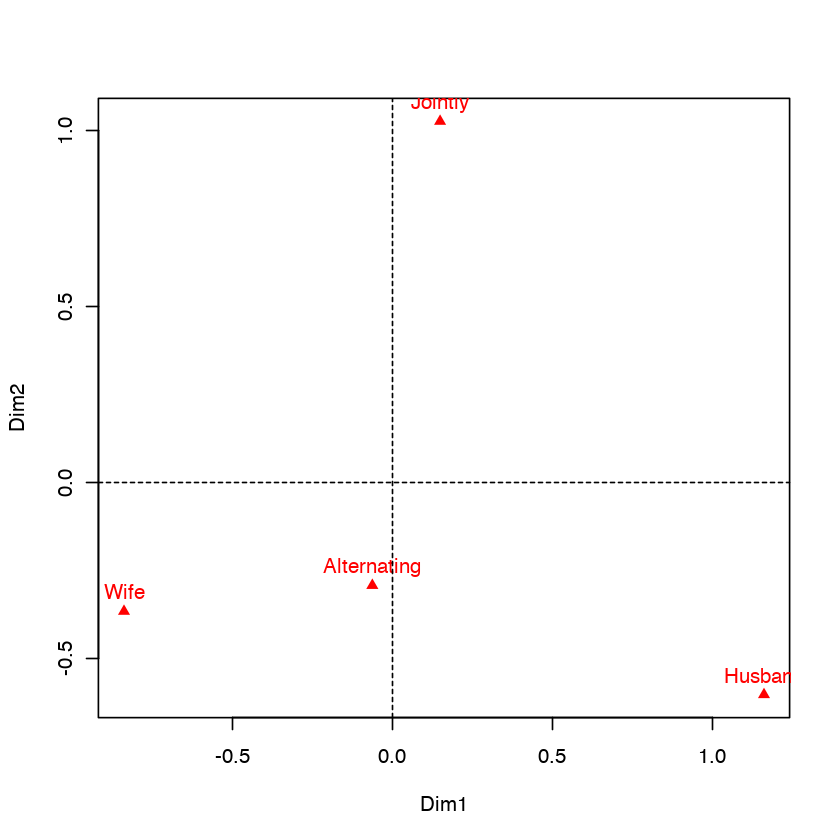

In [34]:
# plot
plot(col.coord, pch=17, col="red")
text(col.coord, labels=rownames(col.coord), pos = 3, col="red")
abline(v=0, h=0, lty=2)

### 행렬도 (Biplot) 에서 가로변수(row) 와 세로변수(column) 의 관련도 보기

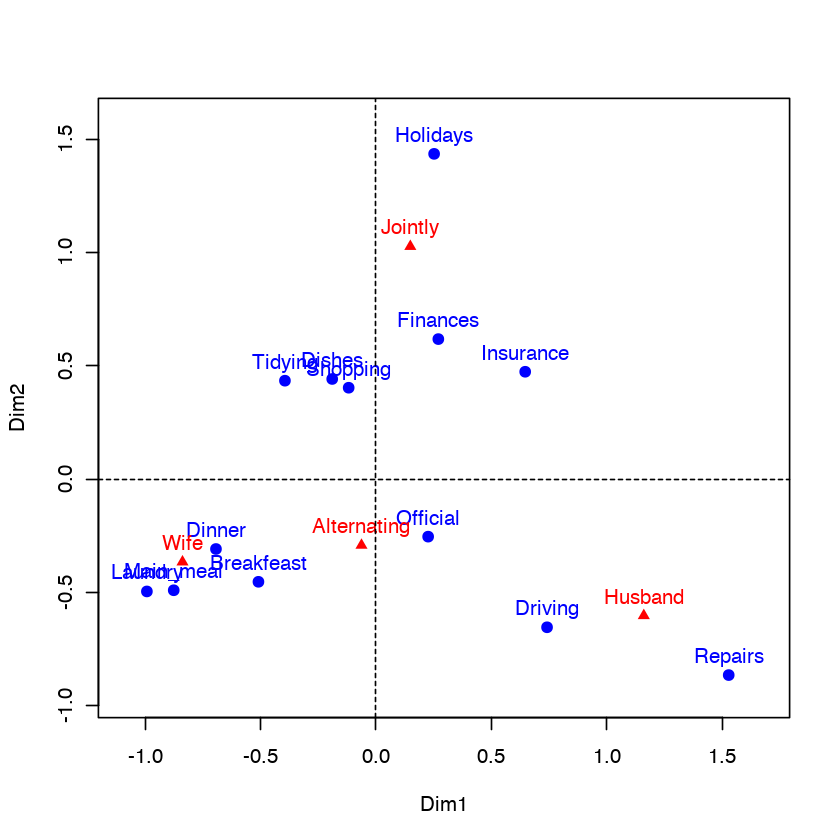

In [39]:
xlim <- range(c(row.coord[,1], col.coord[,1])) * 1.1
ylim <- range(c(row.coord[,2], col.coord[,2])) * 1.1

# plot of row
plot(row.coord, pch=19, col = "blue", xlim=xlim, ylim=ylim)
text(row.coord, labels=rownames(row.coord), pos=3, col="blue")

# plot of column
points(col.coord, pch=17, col="red")
text(col.coord, labels = rownames(col.coord), pos=3, col="red")
abline(v=0, h=0, lty=2)

**가로변수 (row) 사이의 거리 또는 세로변수 (column) 사이의 거리는 해석이 가능하나. 가로변수 와 세로변수 간의 거리는 의미가 없다.**

### 진단(Diagnostic)

전체 관성 total inertia 는 $\phi^2 = \dfrac{\chi^2}{n} = 1.11494$ 이다.  
예제에서 2 dim plot 는 테이블에서 88% 정도를 표현한다. 이것은 다음 표에서 보면 위 2개 좌표의 누적이 88.6% 정도 나온다.

In [41]:
eig

eig,variance,cumvariance
0.5428893,48.69222,48.69222
0.4450028,39.91269,88.60491
0.1270484,11.39509,100.00000


### 가로 변수, 세로변수 의 기여도

주축에 대한 가로/세로 변수의 각각 기여도는 다음과 같이 계산한다.
$$
row.contrib = \dfrac{row.mass * row.coord^2}{eignevalue}
$$

$$
col.contrib = \dfrac{col.mass * col.coord^2}{eigenvalue}
$$

가로변수(row) 의 기여도를 %로 보자면 다음과 같다.

In [42]:
# contrib <- row.mass * row.coord^2 / eigenvalue
cc <- apply(row.coord^2, 2, "*", row.mass)
row.contrib <- t(apply(cc, 1, "/", eig[1:nb.axes, 1])) * 100
round(row.contrib, 2)

,Dim1,Dim2,Dim3
Laundry,18.29,5.56,7.97
Main_meal,12.39,4.74,1.86
Dinner,5.47,1.32,2.10
Breakfeast,3.82,3.70,3.07
Tidying,2.00,2.97,0.49
Dishes,0.43,2.84,3.63
Shopping,0.18,2.52,2.22
Official,0.52,0.80,36.94
Driving,8.08,7.65,18.60
Finances,0.88,5.56,0.06


In [43]:
library(corrplot)

corrplot 0.84 loaded


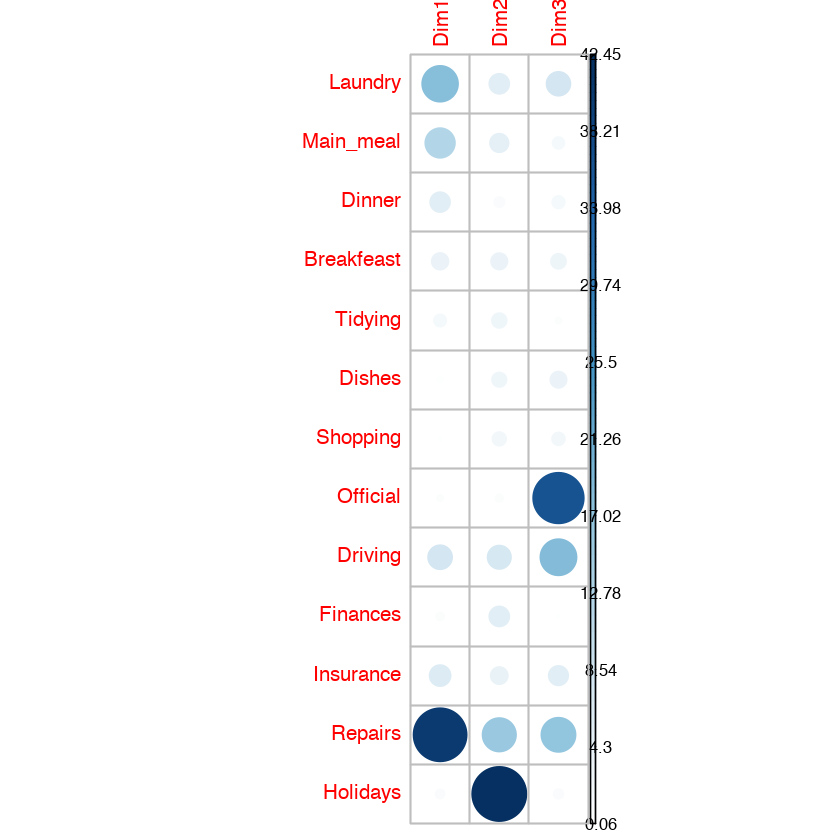

In [44]:
corrplot(row.contrib, is.corr = F)

세로변수 의 기여도 를 % 로 표현

In [45]:
# contrib <- col.mass * col.coord^2/eigenvalue
cc <- apply(col.coord^2, 2, "*", col.mass)
col.contrib <- t(apply(cc, 1, "/", eig[1:nb.axes, 1])) * 100
round(col.contrib, 2)

,Dim1,Dim2,Dim3
Wife,44.46,10.31,10.82
Alternating,0.10,2.78,82.55
Husband,54.23,17.79,6.13
Jointly,1.20,69.12,0.50


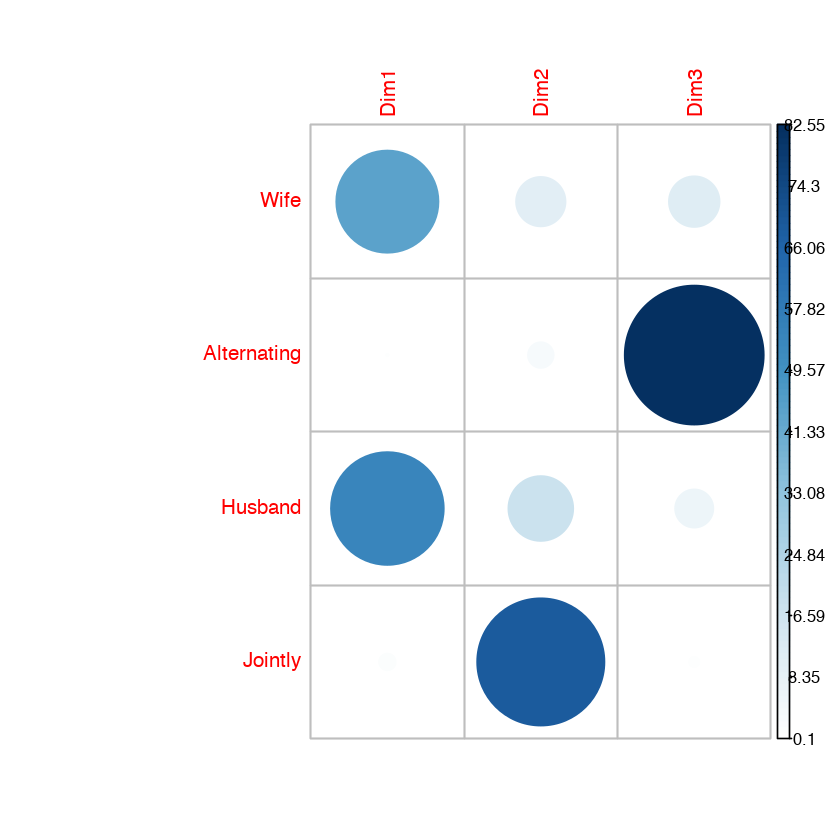

In [46]:
corrplot(col.contrib, is.corr = F)

### Quality of the Represention 표현 품질

Quality of the represention 은 가로변수 또는 세로변수와  평균 프로파일 사이각의 cos^2 을 말한다. 즉 가로변수의 주축좌표와 주축과의 사이각을 표현하고 이것은 가로변수의 주축 길이를 말한다. 이 값이 1 이면, 그 가로변수는 주축위에 있게 된다. 변수는 COS2 로 표현한다.

$$
row.cos2 = \dfrac{row.coord^2}{d^2}
$$

* row.coord : 주축에서 가로변수(row) 의 좌표
* $d^2$ : 평균프로파이 average profile 로 부터 거리 의 제곱

각 row profile 과 average profile 사이 거리는 다음과 같음을 알고 있다.
$$
d^2(row_i, average.profile) = \sum\dfrac{(row.profile_i - average.profile)^2}{average.profile}
$$


In [47]:
row.profile <- housetasks /row.sum
round(row.profile, 3)

,Wife,Alternating,Husband,Jointly
Laundry,0.886,0.080,0.011,0.023
Main_meal,0.810,0.131,0.033,0.026
Dinner,0.713,0.102,0.065,0.120
Breakfeast,0.586,0.257,0.107,0.050
Tidying,0.434,0.090,0.008,0.467
Dishes,0.283,0.212,0.035,0.469
Shopping,0.275,0.192,0.075,0.458
Official,0.125,0.479,0.240,0.156
Driving,0.072,0.367,0.540,0.022
Finances,0.115,0.115,0.186,0.584


In [52]:
average.profile <- col.sum/n
round(average.profile, 3)

Wife Alternating     Husband     Jointly 
      0.344       0.146       0.218       0.292

In [53]:
# 모든 row 변수 에서 평균 프로파일 로 부터 거리는
d2.row <- apply(row.profile, 1,
               function(row.p, av.p) {sum(((row.p - av.p)^2)/av.p)},
               average.profile)
round(d2.row, 3)

Laundry  Main_meal     Dinner Breakfeast    Tidying     Dishes   Shopping 
     1.329      1.034      0.618      0.512      0.353      0.302      0.218 
  Official    Driving   Finances  Insurance    Repairs   Holidays 
     0.968      1.274      0.456      0.727      3.307      2.140

In [54]:
# factor map 에서 cos2 값은
row.cos2 <- apply(row.coord^2, 2, "/", d2.row)
round(row.cos2, 3)

,Dim1,Dim2,Dim3
Laundry,0.740,0.185,0.075
Main_meal,0.742,0.232,0.026
Dinner,0.777,0.154,0.070
Breakfeast,0.505,0.400,0.095
Tidying,0.440,0.535,0.025
Dishes,0.118,0.646,0.236
Shopping,0.064,0.748,0.189
Official,0.053,0.066,0.881
Driving,0.432,0.335,0.233
Finances,0.161,0.837,0.003


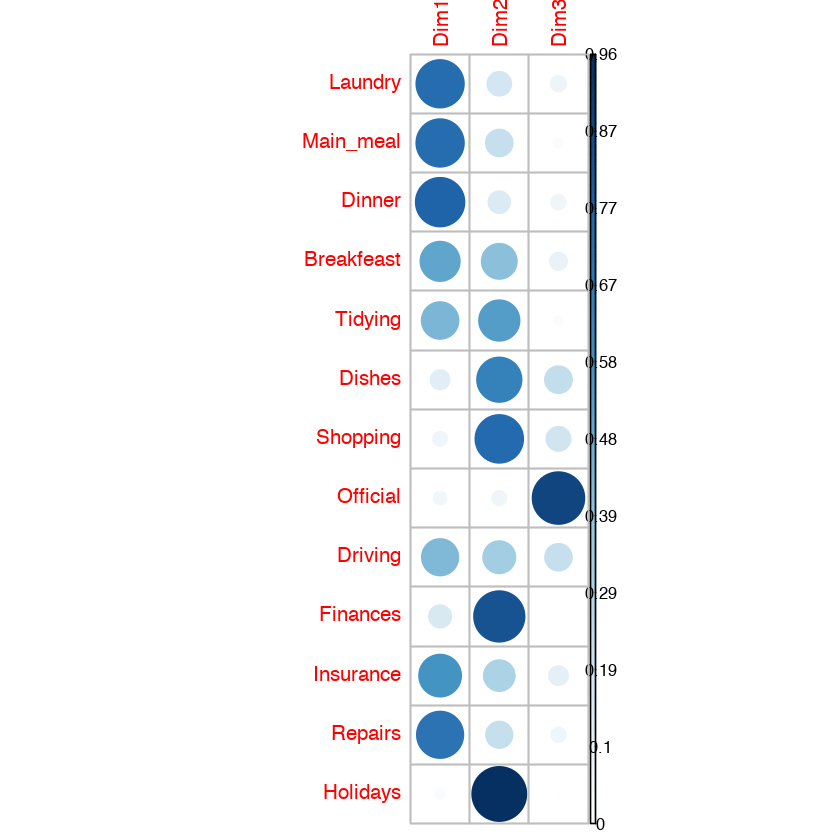

In [55]:
# cos2 를 그래프로 표시
corrplot(row.cos2, is.corr = F)

### Cos2 of column

$$
col.cos2 = \dfrac{col.coord^2}{d^2}
$$

In [58]:
col.profile <- t(housetasks)/col.sum
col.profile <- t(col.profile)

average.profile <- row.sum/n
col.profile
average.profile

,Wife,Alternating,Husband,Jointly
Laundry,0.26000000,0.055118110,0.005249344,0.007858546
Main_meal,0.20666667,0.078740157,0.013123360,0.007858546
Dinner,0.12833333,0.043307087,0.018372703,0.025540275
Breakfeast,0.13666667,0.141732283,0.039370079,0.013752456
Tidying,0.08833333,0.043307087,0.002624672,0.111984283
Dishes,0.05333333,0.094488189,0.010498688,0.104125737
Shopping,0.05500000,0.090551181,0.023622047,0.108055010
Official,0.02000000,0.181102362,0.060367454,0.029469548
Driving,0.01666667,0.200787402,0.196850394,0.005893910
Finances,0.02166667,0.051181102,0.055118110,0.129666012


Laundry  Main_meal     Dinner Breakfeast    Tidying     Dishes   Shopping 
0.10091743 0.08772936 0.06192661 0.08027523 0.06995413 0.06479358 0.06880734 
  Official    Driving   Finances  Insurance    Repairs   Holidays 
0.05504587 0.07970183 0.06479358 0.07970183 0.09461009 0.09174312

In [59]:
d2.col <- apply(col.profile, 2, 
        function(col.p, av.p){sum(((col.p - av.p)^2)/av.p)}, 
        average.profile)
round(d2.col,3)

Wife Alternating     Husband     Jointly 
      0.875       0.809       1.746       1.078

In [60]:
col.cos2 <- apply(col.coord^2, 2, "/", d2.col)
round(col.cos2, 3)

,Dim1,Dim2,Dim3
Wife,0.802,0.152,0.046
Alternating,0.005,0.105,0.890
Husband,0.772,0.208,0.020
Jointly,0.021,0.977,0.002


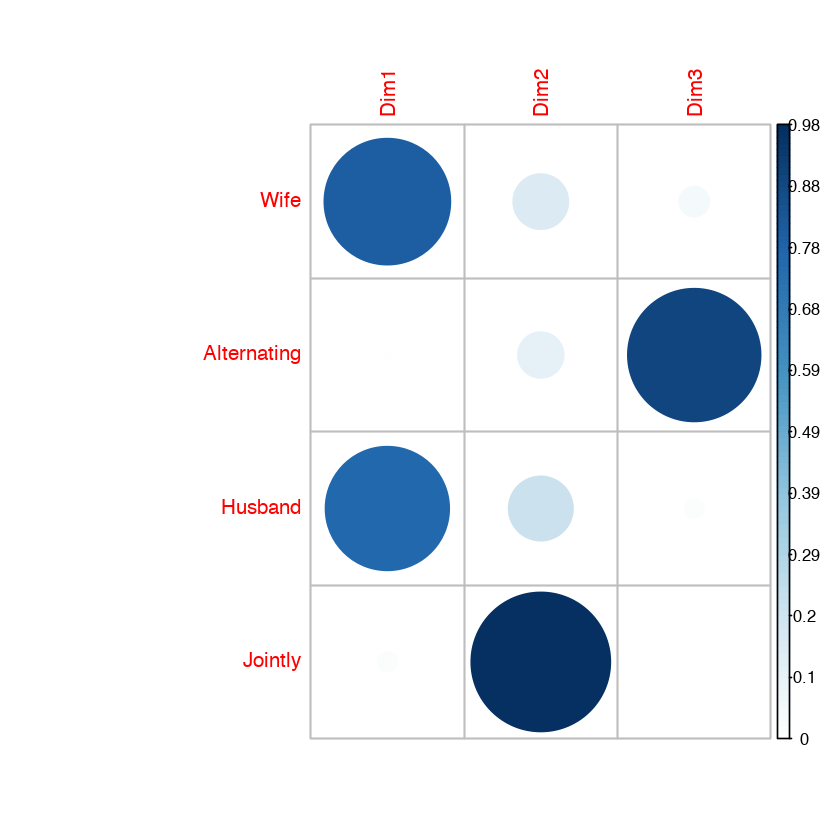

In [61]:
corrplot(col.cos2, is.cor = FALSE)

## R 에서 실전

r 에서는 ca 용 함수를 직접 제공합니다. 
CA()

In [62]:
library(FactoMineR)

In [64]:
res.ca <- CA(housetasks, graph = F)

In [65]:
res.ca

**Results of the Correspondence Analysis (CA)**
The row variable has  13  categories; the column variable has 4 categories
The chi square of independence between the two variables is equal to 1944.456 (p-value =  0 ).
*The results are available in the following objects:

   name              description                   
1  "$eig"            "eigenvalues"                 
2  "$col"            "results for the columns"     
3  "$col$coord"      "coord. for the columns"      
4  "$col$cos2"       "cos2 for the columns"        
5  "$col$contrib"    "contributions of the columns"
6  "$row"            "results for the rows"        
7  "$row$coord"      "coord. for the rows"         
8  "$row$cos2"       "cos2 for the rows"           
9  "$row$contrib"    "contributions of the rows"   
10 "$call"           "summary called parameters"   
11 "$call$marge.col" "weights of the columns"      
12 "$call$marge.row" "weights of the rows"         

In [68]:
# eigen value
res.ca$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.5428893,48.69222,48.69222
dim 2,0.4450028,39.91269,88.60491
dim 3,0.1270484,11.39509,100.00000


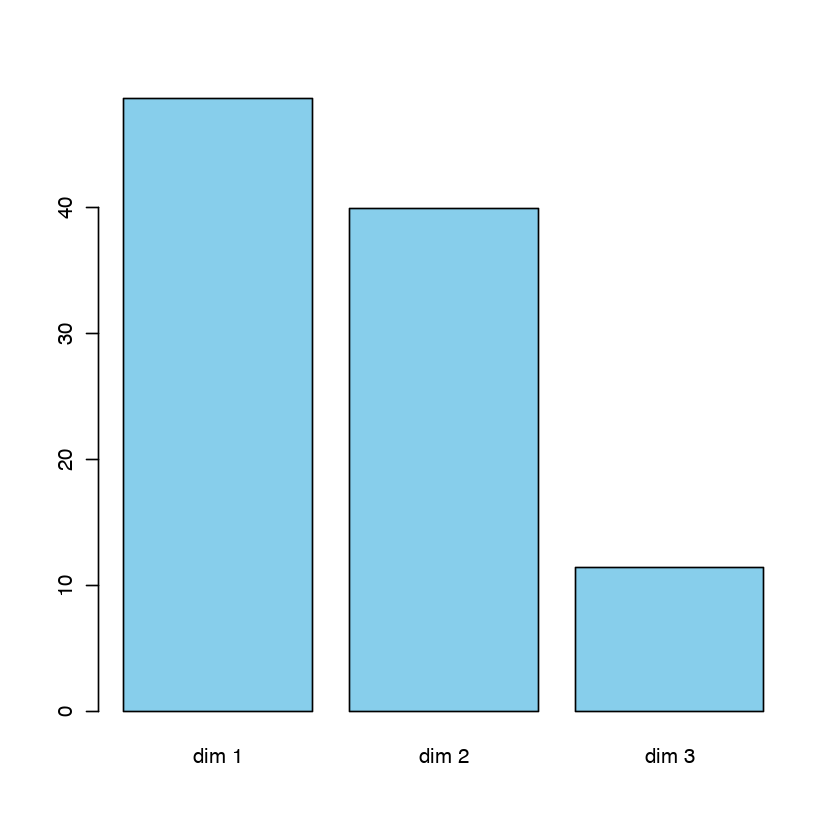

In [71]:
# barplot of percentage of variance
barplot(res.ca$eig[,2], names.arg=rownames(res.ca$eig), col="skyblue")

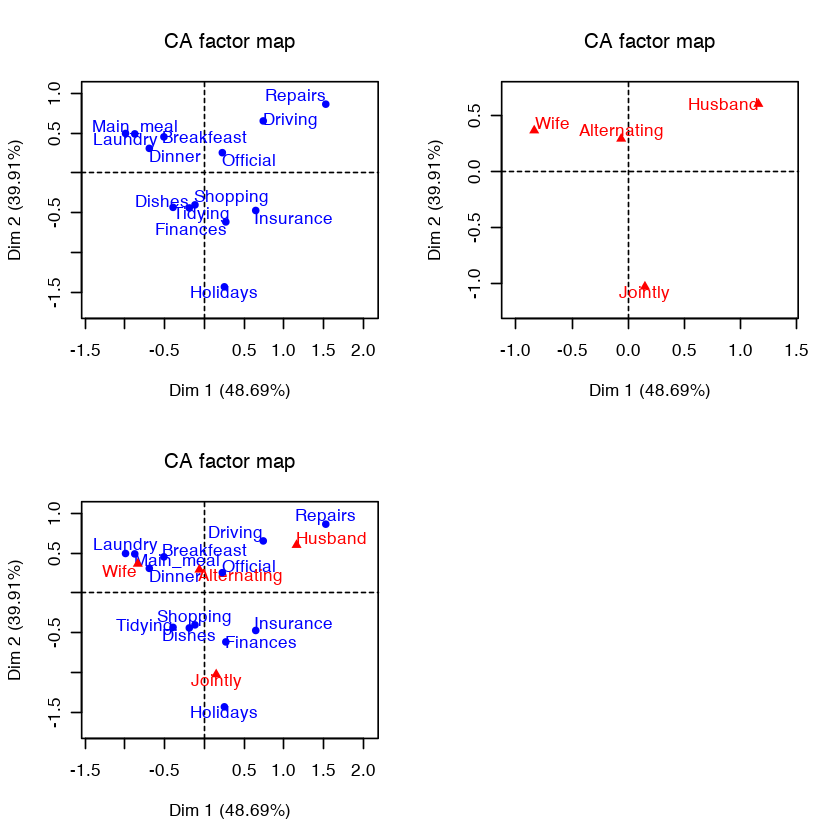

In [79]:
# Plot row points
# 그래프는 왼쪽 부터 시계방향으로 순서대로 표시
par(mfrow=c(2,2))
plot(res.ca, invisible = "col")
plot(res.ca, invisible = "row")
plot(res.ca)

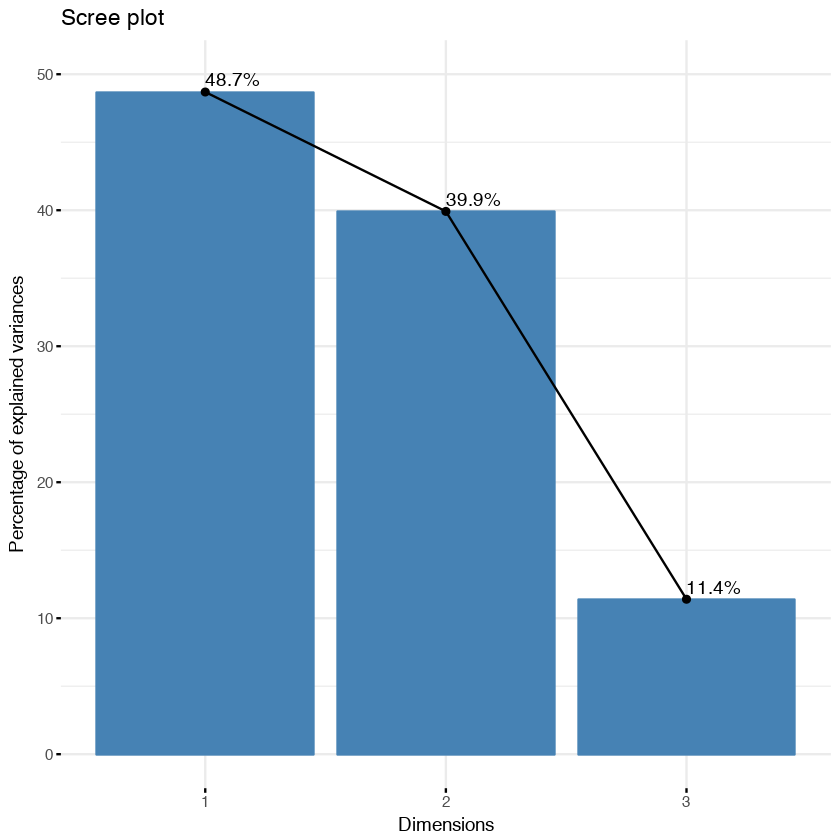

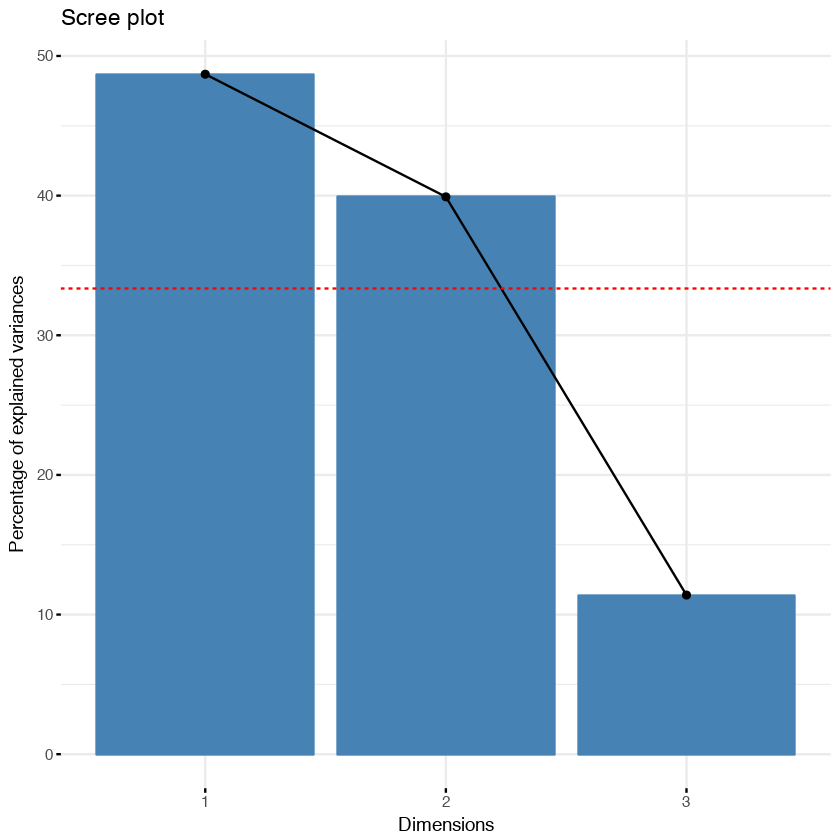

In [85]:
# 스크린 플롯
fviz_screeplot(res.ca, addlabels = TRUE, ylim = c(0, 50))
fviz_screeplot(res.ca) +
 geom_hline(yintercept=33.33, linetype=2, color="red")

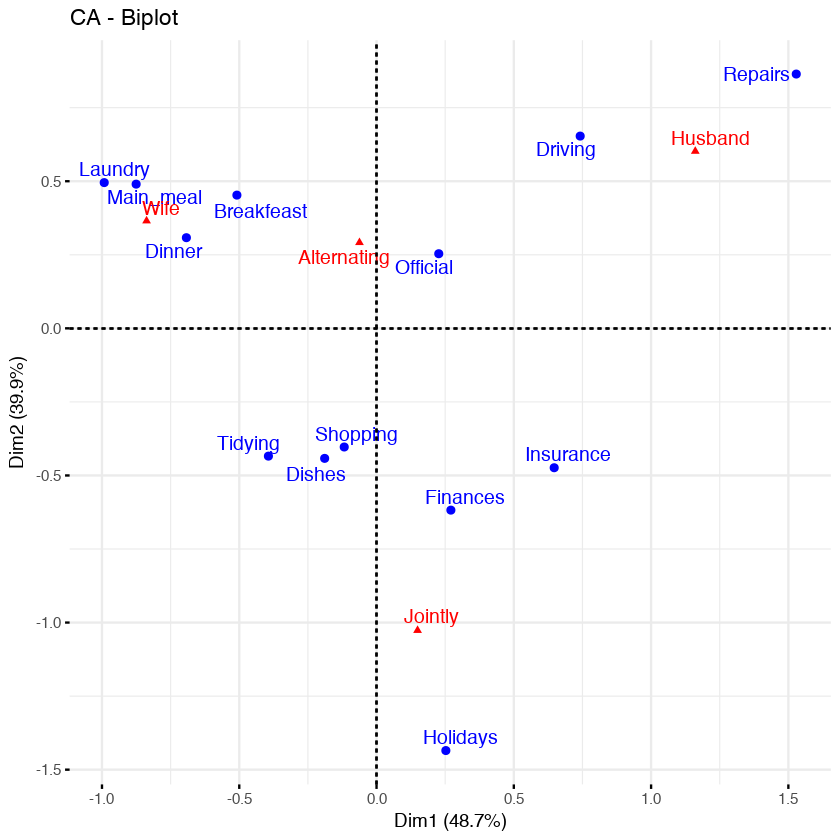

In [86]:
# 행렬도 Biplot
# repel= TRUE to avoid text overlapping (slow if many point)
fviz_ca_biplot(res.ca, repel = TRUE)

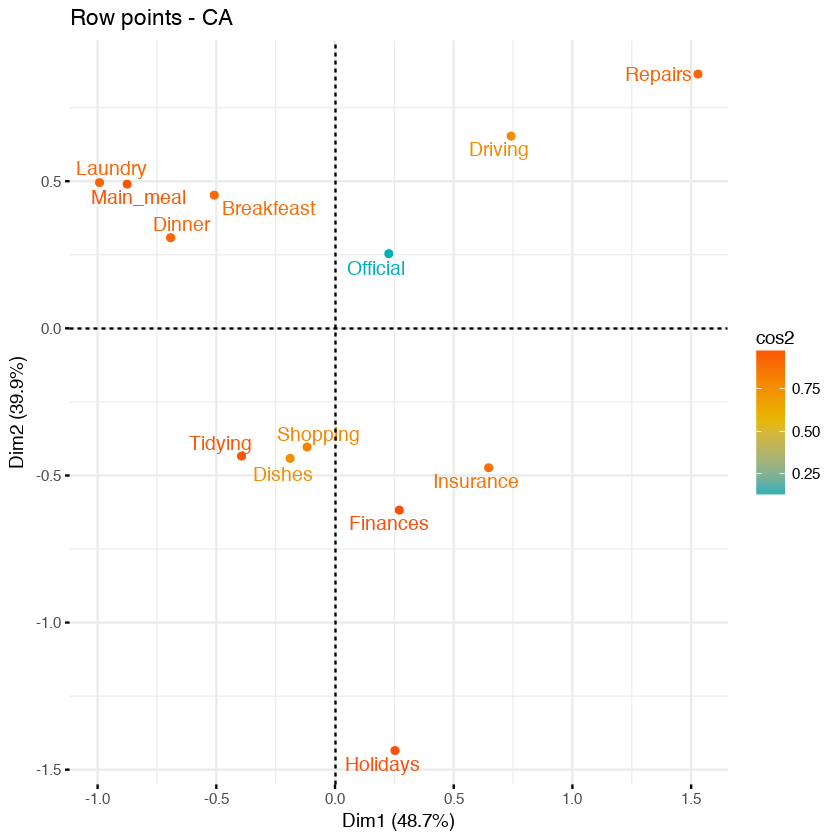

In [87]:
# Color by cos2 values: quality on the factor map
fviz_ca_row(res.ca, col.row = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE)

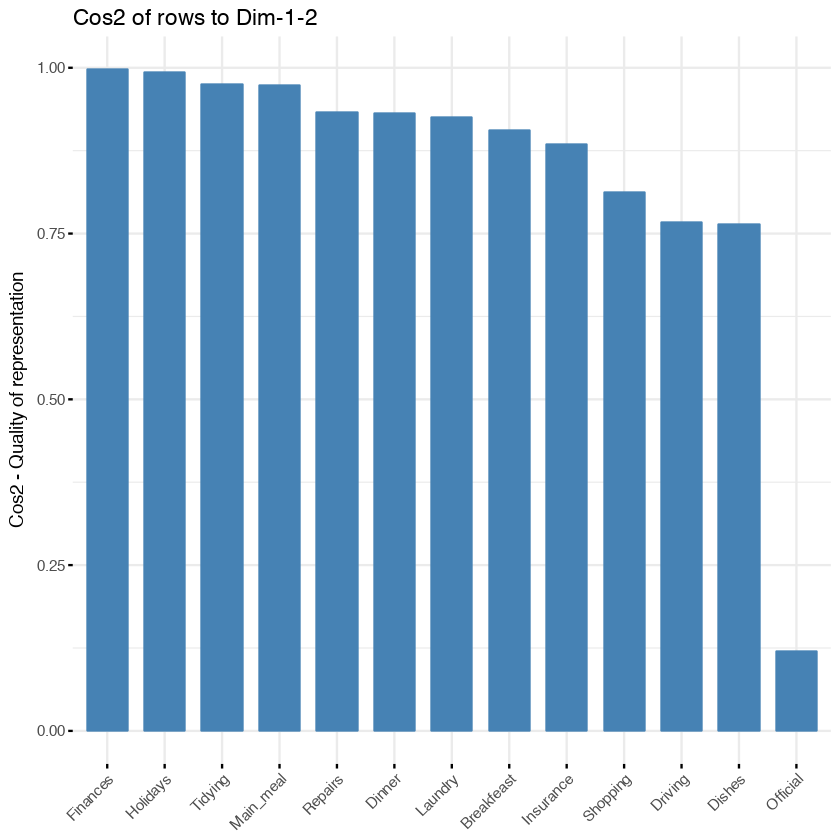

In [88]:
# Cos2 of rows on Dim.1 and Dim.2
fviz_cos2(res.ca, choice = "row", axes = 1:2)

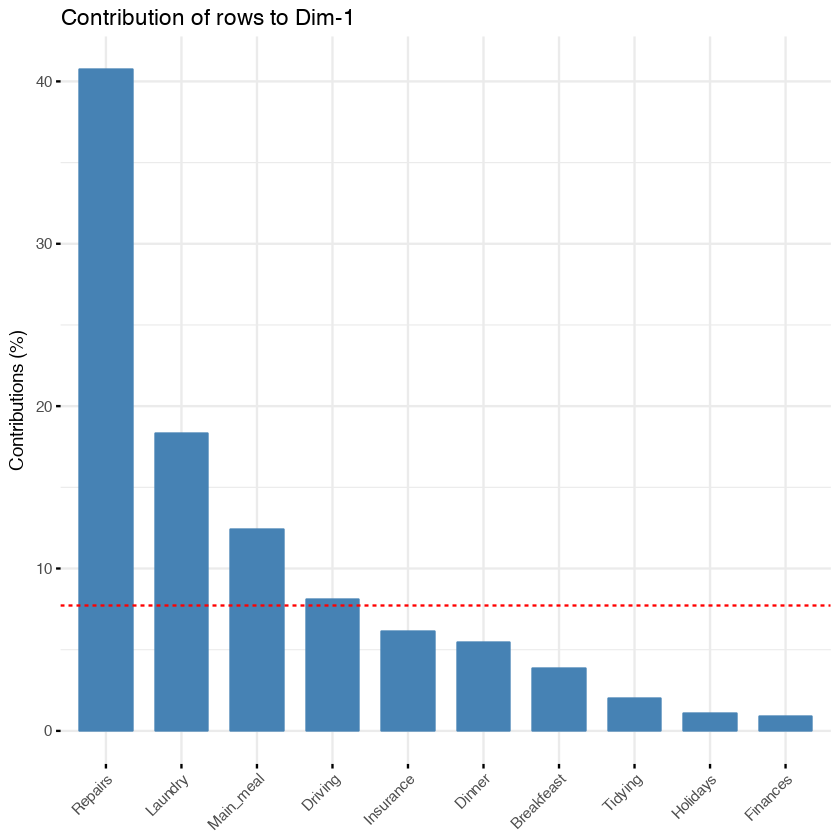

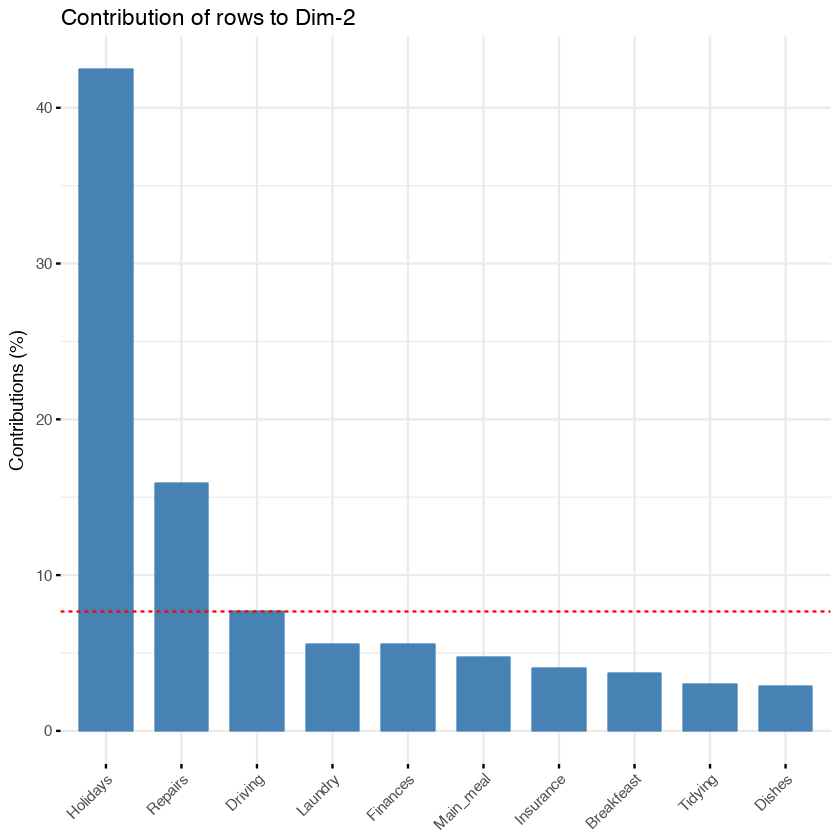

In [91]:
# Contributions of rows to dimension 1
fviz_contrib(res.ca, choice = "row", axes = 1, top = 10)
# Contributions of rows to dimension 2
fviz_contrib(res.ca, choice = "row", axes = 2, top = 10)